# Flower  Classification

A machine learning project that uses Convolutional Neural Networks to predict flower species based on images.

# Import Libraries

In [1]:
# General Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import pandas as pd
import gradio as gr
import random

# Machine learning libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Data Analysis

## Total Images from each Flower Category

To find out <b>how many images in each category</b> as well as <b>how many overall total images in the dataset</b>. 

In [2]:
# Define main path
base_dir = './flowers/'

# Get flower categories
categories = os.listdir(base_dir)

# Empty list to store images
flower_images = []

# Empty list to store both flower type and their total images
flowers_count_list = []

# Get images from each flower category
for category in categories:
    image = os.listdir(f"{base_dir}/{category}")
    flower_images.append(image)

# Count total images from each flower category
for i in range(len(flower_images)):
    flowers_count_list.append(pd.Series({"Flower Category": categories[i], "Total Images": len(flower_images[i])}))

# Create dataframe of flower category and their total images
df_flowers_count = pd.DataFrame(flowers_count_list)

# Calculate sum of all flower's total images
total_images_sum = df_flowers_count['Total Images'].sum()

# Display result
print(f'Total of all Images: {total_images_sum}')
df_flowers_count

Total of all Images: 4317


,Flower Category,Total Images
0,daisy,764
1,dandelion,1052
2,rose,784
3,sunflower,733
4,tulip,984


## Display Image of each Flower Category

To see how the flower looks like from each category.

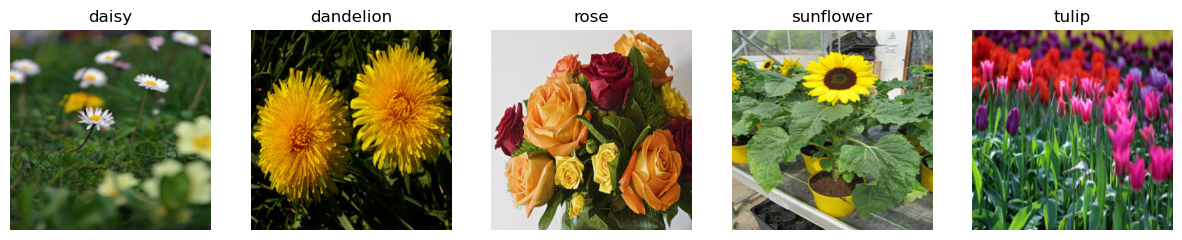

In [3]:
# Create subplot 
fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

# Get image from each category
for i, category in enumerate(categories):
    # Get random image file in each category
    category_path = os.listdir(os.path.join(base_dir, category))
    random_image = random.choice(category_path)
    image_file_path = os.path.join(base_dir, category, random_image)

    # Load and display the image
    image = cv2.imread(image_file_path) # read image data
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to original colors
    image = cv2.resize(image, (350,350)) # resize image so that all images share same size
    axes[i].imshow(image) # display image
    axes[i].set_title(category) # category title of image
    axes[i].axis('off') # disable axis

# Display results
plt.show() 

# Data Preprocessing

Data preprocessing is applied to all images, making it readable and understandable for the machine. 

In [4]:
# Set size to images
IMAGE_SIZE = 244

# Function for data preprocessing the image 
def data_preprocess(image, image_size):
    try:
        # Get image data (convert image to numerical data)
        image_data = cv2.imread(image)

        # Convert image to original colors
        image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)

        # Resize and downscale image
        image_data = cv2.resize(image_data, (image_size,image_size), interpolation=cv2.INTER_AREA)

        # Convert image data to numpy array and float value
        image_data = np.array(image_data, dtype=np.float32)

        # Normalize pixel values of image to a range of 0-1
        image_data = image_data.astype(np.float32) / 255.0

        return image_data
    except Exception as e:
        print(f"Error Image Loading: {e}")
        return None

The code below, <code>data_preprocess()</code> function is applied to preprocess the data of all images. The preprocessed data is stored on the list along with the label category. This list will be saved as pickle data for later use.

In [5]:
# Empty list to store all image preprocessed data along with its label
data = []

# Go through each flower category
for category in categories:
    # Define category path
    path = os.path.join(base_dir, category)

    # Convert category to index as a label
    label = categories.index(category)
    
    # Get image file and preprocess its data
    for img_name in os.listdir(path):
        image_path = os.path.join(path, img_name)
        image = data_preprocess(image_path, IMAGE_SIZE)

        # Append proprocessed data of image including its label
        if image is not None:
            data.append([image, label])

# Save all image data as pickle file
save_image_data = open('flower_data.pkl','wb')
pickle.dump(data, save_image_data)
save_image_data.close()

Here, we load the pickle file that stores all the preprocessed data, including the labels. The data will be seperated to features (the input) and labels (the output). <br>
The labels are identified like this:<br>
0 -> daisy	<br>
1 -> dandelion <br>	
2 -> rose <br>
3 -> sunflower <br>	
4 -> tulip <br>

In [6]:
# Load image data from saved pickle file
load_images_data = open('flower_data.pkl','rb')
data = pickle.load(load_images_data)
load_images_data.close()

# Randomly shuffle data
np.random.shuffle(data)

# Empty list to store features (image data) and labels (results)
features = []
labels = []

# Append features and labels seperately from the data
for feature, label in data:
    features.append(feature)
    labels.append(label)

# Convert features and labels to numpy array
features = np.array(features, dtype=np.float32)
labels = np.array(labels)

# Data Splitting

This section is for splitting the data into training and testing where 80% of data goes to training and 20% of data goes to testing. <br>
Labels are also converted to one-hot encoded. This is important when trying to train neural networks model. <br>
How one-hot encoded labels look like: <br>
[1, 0, 0, 0, 0] -> daisy	<br>
[0, 1, 0, 0, 0] -> dandelion <br>	
[0, 0, 1, 0, 0] -> rose <br>
[0, 0, 0, 1, 0] -> sunflower <br>	
[0, 0, 0, 0, 1] -> tulip <br>

In [7]:
# Assign input and output data
(X, y) = features, labels

# Convert index labels to one-hot encoded labels (important for neural networks)
y = to_categorical(y)

# Split data to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert y data to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [8]:
# Checking the shapes of training and testing data to ensure the image size and RGB channel numbers are the same for X data
print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("y Train:", y_train.shape)
print("y test:", y_test.shape)

X Train: (3453, 244, 244, 3)
X Test: (864, 244, 244, 3)
y Train: (3453, 5)
y test: (864, 5)


# Data Augmentation

Data augmentation is helpful for the machine to learn and predict new data by adding diversity to the images.  

In [9]:
datagen = ImageDataGenerator(
    rotation_range=10, # Randomly rotate images up to specific degree
    width_shift_range=0.2, # Randomly shift image horizontally 
    height_shift_range=0.2, # Randomly shift image vertically 
    shear_range=0.2, # Apply shear intensity
    zoom_range=0.1, # Randomly zoom image
    horizontal_flip=True, # Randomly flip image horizontally 
    fill_mode='nearest'# Fill newly created pixles
)

datagen.fit(X_train)

# Model Development: Convolutional Neural Network

## Creating the model

In [11]:
# Create model
model = Sequential()

# Input layer
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same',activation ='relu', input_shape = (X_train.shape[1], X_train.shape[1],3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# First hidden layer
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Second hidden layer
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Third hidden layer
model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Fourth hidden layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(5, activation = "softmax"))

## Compiling and summarising the model

In [12]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 244, 244, 32)      2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 122, 122, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 96)        55392     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 96)       

## Train the model

Training the model takes some time and it took me around an hour. The training time speed depends the specs of the computer.

In [59]:
# Define amount of epochs and batch size
batch_size = 100
epochs = 40

# Train model
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_test, y_test), verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/40
34/34 [==============================] - 89s 3s/step - loss: 1.4302 - accuracy: 0.3707 - val_loss: 1.1796 - val_accuracy: 0.4919
Epoch 2/40
34/34 [==============================] - 88s 3s/step - loss: 1.2135 - accuracy: 0.4921 - val_loss: 1.0715 - val_accuracy: 0.5868
Epoch 3/40
34/34 [==============================] - 80s 2s/step - loss: 1.0778 - accuracy: 0.5640 - val_loss: 1.0552 - val_accuracy: 0.6100
Epoch 4/40
34/34 [==============================] - 81s 2s/step - loss: 1.0467 - accuracy: 0.5768 - val_loss: 0.9445 - val_accuracy: 0.6539
Epoch 5/40
34/34 [==============================] - 81s 2s/step - loss: 0.9727 - accuracy: 0.6239 - val_loss: 0.8654 - val_accuracy: 0.6690
Epoch 6/40
34/34 [==============================] - 82s 2s/step - loss: 0.9180 - accuracy: 0.6441 - val_loss: 0.8488 - val_accuracy: 0.6782
Epoch 7/40
34/34 [==============================] - 81s 2s/step - loss: 0.9032 - accuracy: 0.6549 - val_loss: 0.8227 - val_accuracy: 0.6921
Epoch 8/40
34/34 [==

# Model Evaluation

## Accuracy Score

In [60]:
# Get accuracy score and other evaluation details of the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

27/27 - 4s - loss: 0.5375 - accuracy: 0.8090 - 4s/epoch - 143ms/step
Test Accuracy: 80.90%


## Save Accuracy and Loss scores as CSV file

In [61]:
# Empty list to store and keep track of accuracy and loss
train_acc=[]
val_acc=[]
train_loss=[]
val_loss=[]

In [62]:
# Get train accuracy
for i in history.history['accuracy']:
    train_acc.append(i)

# Get validation accuracy
for i in history.history['val_accuracy']:
    val_acc.append(i)

# Get train loss
for i in history.history['loss']:
    train_loss.append(i)

# Get validation loss
for i in history.history['val_loss']:
    val_loss.append(i)

# Display the length (represented as epochs) of both accuracy and loss
print(f"Train Acc Length: {len(train_acc)}")
print(f"Val Acc Length: {len(val_acc)}")
print(f"Train Loss Length: {len(train_loss)}")
print(f"Val Loss Length: {len(train_loss)}")

Train Acc Length: 40
Val Acc Length: 40
Train Loss Length: 40
Val Loss Length: 40


In [77]:
# Store accuracy and loss as dataframe
df_scores = pd.DataFrame({
    'Train Acc': train_acc,
    'Val Acc': val_acc,
    'Train Loss': train_loss,
    'Val Loss': val_loss
})

# Save accuracy and loss scores as csv
df_scores.to_csv('model_scores_2.csv', index=False)

## Accuracy and Loss Graph of Model

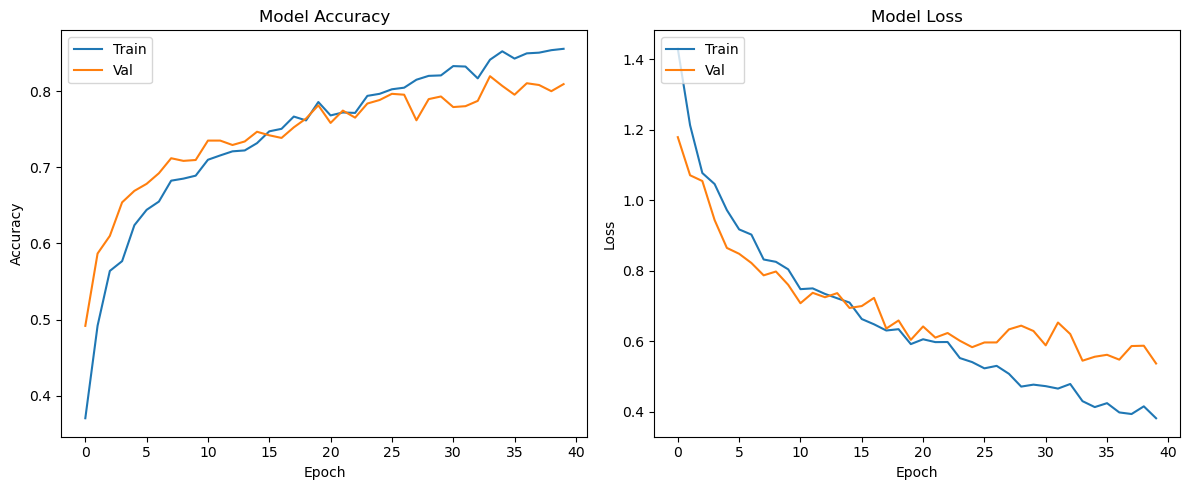

In [63]:
# Plot the training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper left')

# Display graph
plt.tight_layout()
plt.show()

# Saving and Loading the Model

Save Model

In [64]:
# Naming the file for saving model
model_file_name = 'my_model_4.keras'

# Save model
model.save(model_file_name)

Load Model

In [13]:
# Load Model
loaded_model = load_model('my_model_best.keras')

# Test predictions

## Preprocess data of new input image

This is the backend where after the user uploads an image, the function will preprocess the image and make the model predict what type of flower is it.

In [14]:
# Function for getting and preprocessing the new image
# It returns the predicted result
def predict_image(img):
    # set image size
    IMAGE_SIZE = 244

    # Preprocess image
    image_data = np.array(img, dtype=np.float32)
    image_data = cv2.cvtColor(image_data, cv2.COLOR_BGR2RGB)
    image_data = cv2.resize(image_data, (IMAGE_SIZE,IMAGE_SIZE), interpolation=cv2.INTER_AREA)
    image_data = image_data.astype(np.float32) / 255.0
    image_data = np.expand_dims(image_data, axis=0)

    # make the model predict the image
    predictions = loaded_model.predict(image_data)
    class_index = np.argmax(predictions).item()

    return categories[class_index]

## Create Gradio's Image Classification UI

This is a built-in image classification user interface provided by Gradio. Users can upload flower images for the model to predict.

In [ ]:
# Create gradio image classification UI
gr.Interface(fn=predict_image, # call function for predicting image
             inputs=gr.Image(), # get image input
             outputs=gr.Label(num_top_classes=5), # display output of model prediction
             ).launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://28b1f9c5a613610c50.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 82ms/step
